# News Mood - Analysis

Five Media Sources "BBC Breaking News", "CBS News", "CNN" and "The New York Times" tweets were collected to analyze followers 100 tweets per media outlet, using VADER Sentiment Analyzer. Following is the trend observerd around 9 pm CT on 02/02/2018.

### Observed Trend - 1

+ Only "The New York Times" followers had positive Average Compound Score. Remaining four Media Sources resulted in negative Average Compound Score. Even though CNN and FOX cameout with negative Average Compound Score, the score was very close. 

### Observed Trend - 2

+ CNN and FOX with very close to Average Compound Score ~ '0.5', shows that these two media outlets have follower with tweet sentiments very close to each other. 

### Observed Trend - 3

+ BBC, CBS, CNN and FOX followers show negative Average Compound Score and Tweet Polarity. From the Scatter Plot observation big numbet of Fox and NYT tweet followers have neutral sentiment while tweeting.

In [27]:
# Dependencies
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import os
import pprint
from datetime import datetime

In [28]:
#api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('')))))
#file_name = os.path.join(api_dir, "api_keys.json")
file_name = os.path.join("keys/api_keys.json")
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [29]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [30]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [31]:
# Target User Account
target_user = ["@BBCBreaking", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
twitter_info = []

# Iterate through DataFrame
for out_feed in target_user:

    # To loop through five pages (100 tweets)
    for x in range(5):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(out_feed, page=x)
        # print to ensure the code is running correctly
        # pprint.pprint(public_tweets)
        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            # Replace the row information for each into the dataframe
            twitter_info.append({"Screen_Name": tweet["user"]["name"],
                              "Date": tweet["created_at"],
                              "Tweet_Text": tweet["text"],
                              "Followers": tweet["user"]["followers_count"],
                              "Compound_Score": compound,
                              "Positive_Score": pos,
                              "Neutral_Score": neu,
                              "Negative_Score": neg})

In [32]:
# Create the dataframe out of the appended information from the code
# Create a csv to save the information locally
twitter_df = pd.DataFrame(twitter_info)
twitter_df.to_csv("Output/Twitter_Sentiment.csv")
twitter_df.head()

,Compound_Score,Date,Followers,Negative_Score,Neutral_Score,Positive_Score,Screen_Name,Tweet_Text
0,-0.4404,Fri Feb 02 16:59:34 +0000 2018,36868459,0.272,0.617,0.111,BBC Breaking News,President Trump approves release of controvers...
1,-0.1280,Fri Feb 02 14:22:13 +0000 2018,36868459,0.218,0.661,0.121,BBC Breaking News,Father of victim tries to attack disgraced US ...
2,-0.7845,Fri Feb 02 12:55:15 +0000 2018,36868459,0.277,0.723,0.000,BBC Breaking News,"Finsbury Park attacker Darren Osborne, who dro..."
3,-0.7964,Fri Feb 02 10:20:23 +0000 2018,36868459,0.321,0.679,0.000,BBC Breaking News,Ninety migrants feared drowned after boat caps...
4,-0.6908,Fri Feb 02 09:00:47 +0000 2018,36868459,0.305,0.695,0.000,BBC Breaking News,Two army helicopters collide in southern Franc...


In [33]:
# to ensure the screen names are displayed correctly
twitter_df['Screen_Name'].value_counts()

Fox News              100
BBC Breaking News     100
CBS News              100
The New York Times    100
CNN                   100
Name: Screen_Name, dtype: int64

In [34]:
# creating dataframes for each news organization
bbc_df = twitter_df.loc[twitter_df['Screen_Name'] == 'BBC Breaking News']
cbs_df = twitter_df.loc[twitter_df['Screen_Name'] == 'CBS News']
cnn_df = twitter_df.loc[twitter_df['Screen_Name'] == 'CNN']
fox_df = twitter_df.loc[twitter_df['Screen_Name'] == 'Fox News']
nyt_df = twitter_df.loc[twitter_df['Screen_Name'] == 'The New York Times']

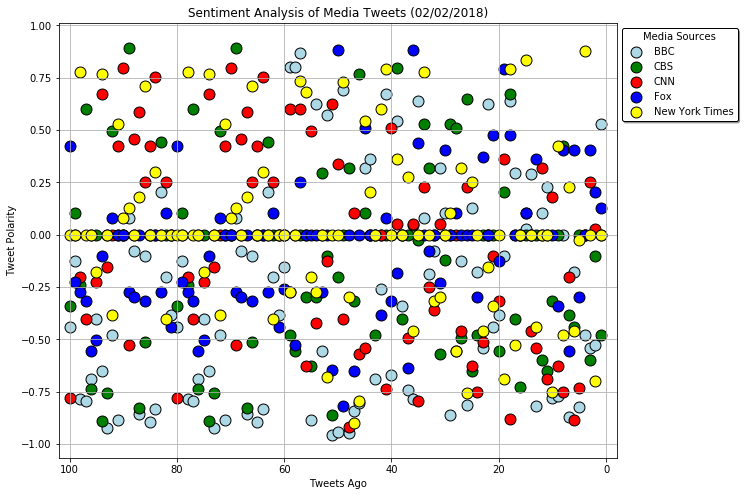

In [35]:
# Creating scatter plots for the data
#plt.scatter(df.col1, df.col2, s=df.col3)
x_values = np.arange(1,bbc_df.shape[0]+1)

plt.figure(figsize=(10,8))
plt.scatter(x_values[::-1],bbc_df['Compound_Score'],s=120,edgecolors='black',color = 'lightblue', label = 'BBC')
plt.scatter(x_values[::-1],cbs_df['Compound_Score'],s=120,edgecolors='black',color='green', label='CBS')
plt.scatter(x_values[::-1],cnn_df['Compound_Score'],s=120,edgecolors='black',color = 'red', label = 'CNN')
plt.scatter(x_values[::-1],fox_df['Compound_Score'],s=120,edgecolors='black',color='blue', label='Fox')
plt.scatter(x_values[::-1],nyt_df['Compound_Score'],s=120,edgecolors='black',color='yellow', label='New York Times')
plt.legend(frameon=True,shadow=True,edgecolor='black',title='Media Sources',bbox_to_anchor=(1, 1))
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.grid()
current = datetime.now()
current = current.strftime("%m/%d/%Y")
plt.title('Sentiment Analysis of Media Tweets ({})'.format(current))

plt.xlim(102,-2);
plt.savefig('Output/Analysis_of_all_tweets.png')

In [36]:
# Need to create dataframe(s) with the overall sentiments for each organization
## using the .agg function allows me to pull the data from the original dataframe in a few lines, instead of working in individual dataframes for each news outlet
overall_sentiments = twitter_df.groupby(["Screen_Name"]).agg({"Compound_Score":[np.mean]})
overall_sentiments.columns = ["_".join(x) for x in overall_sentiments.columns.ravel()]
avg_score = overall_sentiments.rename(columns={"Compound_Score_mean":"Average Compound Score"})
avg_score.index.name = 'Media Sources'
avg_score

,Average Compound Score
Media Sources,
BBC Breaking News,-0.278641
CBS News,-0.096005
CNN,-0.050336
Fox News,-0.051834
The New York Times,0.036753


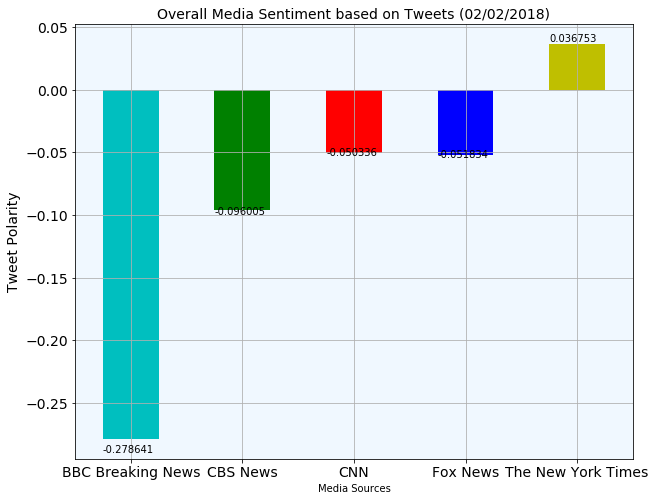

In [37]:
# Create a bar plot to visualize the compound scores for each news outlet
my_colors = ('cgrby')
ax = avg_score.plot(kind='bar', figsize=(10,8), fontsize=14, color=my_colors)
ax.legend_.remove()
ax.set_facecolor("aliceblue")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()*1.04))
plt.ylabel('Tweet Polarity', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.grid()
current = datetime.now()
current = current.strftime("%m/%d/%Y")
plt.title('Overall Media Sentiment based on Tweets ({})'.format(current), fontsize=14);
plt.savefig('Output/Overall_Sentiments.png')